# Principle Component Analysis (PCA)

## Overview
Principle component Analysis (PCA) is a form of predictor transformation known as data reduction. In datasets with large data dimensionality, that is, a large number of independent predictor variables or features, PCA can dramatically speed up model analysis by reducing the number of features, or dimensionality, used in the analysis. PCA performs this bit of magic by the application of some clever linear algebra to project the entire dataset onto a different subspace using the vector components that produce the greatest amount of information. A more detailed description of the math involved includes discussions of eigenvalues, eigenvectors (for mapping), and Singular Vector Decomposition (SVD) in order to maximize the explained variance (information). For a detailed explanation, here are a couple of good links:

https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html  
  
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb 
  
PCA is considered an unsupervised algorithm, and focuses on the relationship between the x and y variables, not on trying to predict the y values from the x values. Hence, after the application of the PCA transformation, a model selection and fit activity is still required to derive a predictor model solution.  
  
Even though PCA is fundamentally a dimensionality reduction algorithm, it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. We will focus on understanding how to use PCA for dimensionality reduction.  
  
We will be using sci-kit learn's PCA implementation so here's a link for reference:  
  
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  


## Importing the libraries


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Importing the data set

In [20]:
# we'll use the same data set as used in the Day Three Multiple Linear regression code where we'll use PCA to see if
# we can identify the predictor variables that provide the largest amount of information for use in fitting a
# linear model
# a reminder, this dataset looks at the R&D spending, administrative and marketing costs, and state of operation 
# for new startups (independent variables) and how much profit they made (dependent variable).
#
# Next, we'll bring in the dataset
# Remember to put your specific path to where you downloaded the datasets
dataset = pd.read_csv('data/50_Startups.csv')

# Let's look at the dataset to see what it's made up of
print (dataset.iloc[:3])

# and look at the information about the data
print(dataset.info())

x = dataset.iloc[ :, 0:3].values
y = dataset.iloc[ : , 4 ].values

# To simplify things for now, we're going to remove the State column, which is a categorical variable. 
# In a real analysis we would perform a transformation on the categorical variable in order to get a numerical 
# representation like we've done in previous activities. For now we'll just remove it so we can focus on PCA.
print ("x values look like ", x[:3])

# and the y vector contains only the data from the last column of the dataset
print ("y values look like ", y[:3])



   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB
None
x values look like  [[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]]
y values look like  [192261.83 191792.06 191050.39]


PCA is affected by scale so we'll need to do scaling and normalization like we usually do before applying PCA. 

In [21]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
#
print(x_std[0:4,:])

[[ 2.01641149  0.56075291  2.15394309]
 [ 1.95586034  1.08280658  1.9236004 ]
 [ 1.75436374 -0.72825703  1.62652767]
 [ 1.55478369 -0.09636463  1.42221024]]


In [22]:
# apply PCA to the independent variable set
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(x_std)
#
print("principle components = ", pca.components_)
print("explained variance for the components = ", pca.explained_variance_)
print("principle component variance ratio = ", pca.explained_variance_ratio_)

principle components =  [[ 0.71114538  0.19933739  0.67419349]
 [-0.03367692 -0.94820268  0.31587583]
 [-0.70223794  0.2473384   0.66759688]]
explained variance for the components =  [1.79024143 1.04010702 0.23087604]
principle component variance ratio =  [0.5848122  0.33976829 0.07541951]


For this dataset we generated three principle components to match the dimensionality of the independent variable set. The variance ratio shows that the three components account for 58% + 34% + 8% = 100% of the data variance. PCA is frequently used for dimensionality reduction and, as we can see from this example, if we just use the first two principle components, they can account for over 92% of the data variance. This is a somewhat trivial example but you can see how if your data set includes dozens, of even hundreds, of independent variables a PCA analysis can help determine the effect of decreasing the dimensionality in order to more easily model the data.
Let's do another example that we can actualy visualize the principle components.

## Generate the Dataset

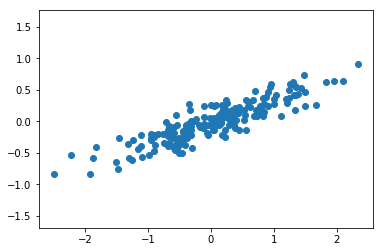

In [23]:
data = np.random.RandomState(1)
x2 = np.dot(data.rand(2,2), data.randn(2,200)).T
plt.scatter(x2[:,0], x2[:,1])
plt.axis('equal');

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.

In [24]:
pca2 = PCA(n_components=2)
pca2.fit(x2)
#
print("principle components = ", pca2.components_)
print("explained variance for the components = ", pca2.explained_variance_)
print("principle component variance ratio = ", pca2.explained_variance_ratio_)

principle components =  [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
explained variance for the components =  [0.7625315 0.0184779]
principle component variance ratio =  [0.97634101 0.02365899]


## Visual Analysis

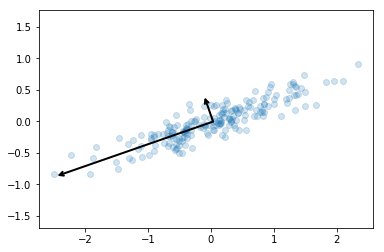

In [25]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(x2[:, 0], x2[:, 1], alpha=0.2)
for length, vector in zip(pca2.explained_variance_, pca2.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca2.mean_, pca2.mean_ + v)
plt.axis('equal');

# These vectors represent the principal axes of the data, and the length of the vector is an indication 
# of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure 
# of the variance of the data when projected onto that axis. The projection of each data point onto the principal 
# axes are the "principal components" of the data.

## Visualizing Dimensionality Reduction

In [26]:
pca = PCA(n_components=1)
pca.fit(x2)
x_pca = pca.transform(x2)
print("original shape = ", x2.shape)
print("transformed shape = ", x_pca.shape)

original shape =  (200, 2)
transformed shape =  (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

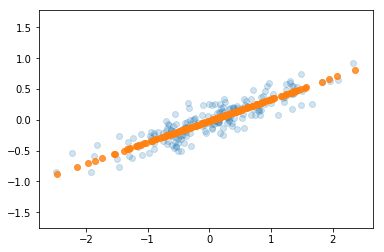

In [27]:
x_new = pca.inverse_transform(x_pca)
plt.scatter(x2[:, 0], x2[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal');

The blue points are the original data, while the orange points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.